# フォロワー獲得の要因の分析

* フォロワーが増える要因が何かを可視化する
* 取得したデータは以下のとおり


In [264]:
import pandas as pd 
df1 = pd.read_csv("never_be_a_pm.csv", index_col=1)
df1.head(3)

,id,text,fav,RT
created_at,,,,
2018-07-28 14:19:38,1023211381246447616,JavaScriptってクラスないの？名前空間は全然違う概念なのか？わからね。この辺よんだけ...,22,2
2018-07-28 13:49:33,1023203810741633024,ですよぇ。僕も場合分けの問題、普通に「よりも大きい」しか使ってなかった記憶があります。 ht...,6,0
2018-07-28 13:45:32,1023202799331336195,学がないのがバレるｗｗｗ,2,0


In [266]:
df2 = pd.read_csv("followers.csv", index_col=1)
df2.head(3)

,created_at,follower_increase,EXECUTION
follower,,,
2843,2018/04/12 0:00:00,0,NaN
2875,2018/04/13 0:00:00,32,NaN
2878,2018/04/14 0:00:00,3,NaN


## 目標

* こちらのデータを利用して、(1)日々のツイート数、(2)日々のリツイート数、(3)日々のいいね数のどれが一番フォロワー獲得数に相関しているかを可視化する

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# データフレームの読み込み
df = pd.read_csv("never_be_a_pm.csv", index_col=0)
print(df.columns)

# timestamp型に変換
df["created_at"] = pd.to_datetime(df["created_at"])

# 日ごとにDailyでfavとRTの合計値をデータを確認
date_grouped_df = df.groupby(df['created_at'].dt.date).sum()
date_grouped_df.head(20)

Index(['created_at', 'text', 'fav', 'RT'], dtype='object')


,fav,RT
created_at,,
2018-02-18,11,1
2018-02-19,1,0
2018-02-20,12,2
2018-02-21,25,6
2018-02-22,34,4
2018-02-23,21,5
2018-02-24,23,3
2018-02-25,14,4
2018-02-26,12,3


In [156]:
# RT数の要約統計量を可視化する 

date_grouped_df.RT.describe()

count      158.000000
mean       585.139241
std       4632.303453
min          0.000000
25%         12.250000
50%         39.500000
75%        107.750000
max      55456.000000
Name: RT, dtype: float64

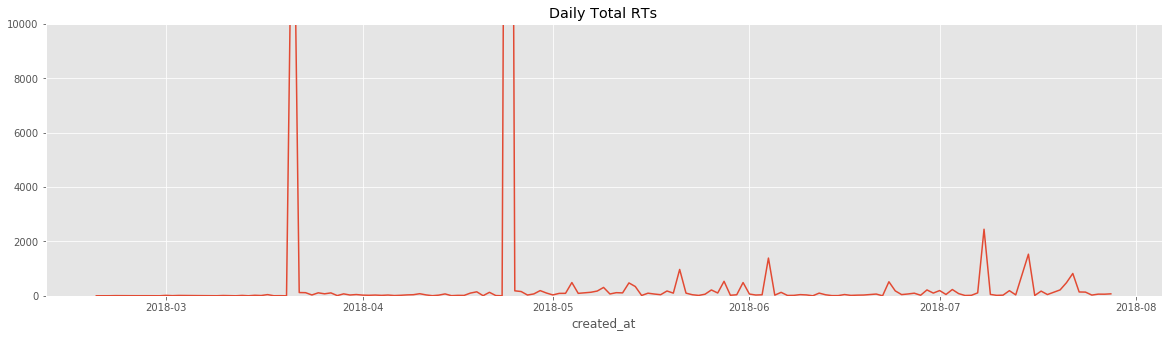

In [279]:
# Matplotlibの設定

%matplotlib inline
plt.style.use("ggplot")

# RT数を時系列グラフに落とし込む

date_grouped_df.RT.plot(
    ylim =(0,10000), # 0-100までを取得
    kind= "line", # 他にもヒストグラム(hist)
    figsize = (20,5), # 画像の大きさ、横：縦をtappleで。
    title = "Daily Total RTs"
)


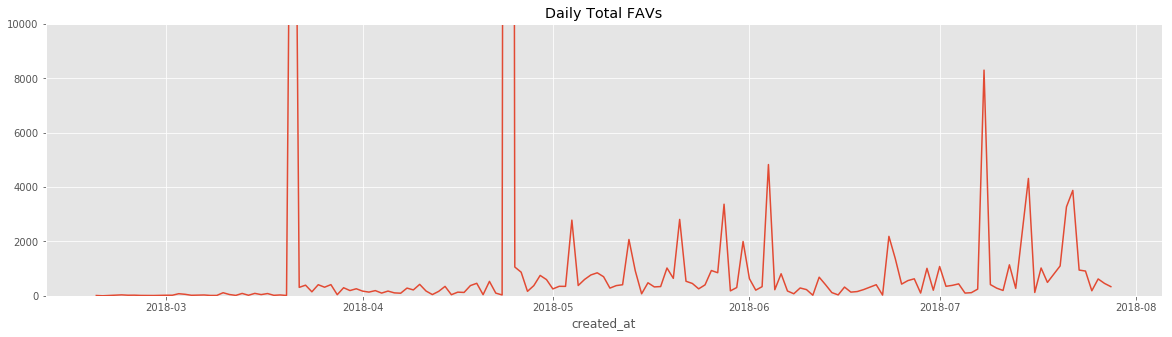

In [278]:
# Favを時系列グラフに落とし込む

date_grouped_df.fav.plot(
    ylim =(0,10000), # 0-100までを取得
    kind= "line", # 他にもヒストグラム(hist)
    figsize = (20,5), # 画像の大きさ、横：縦をtappleで。
    title = "Daily Total FAVs"
)

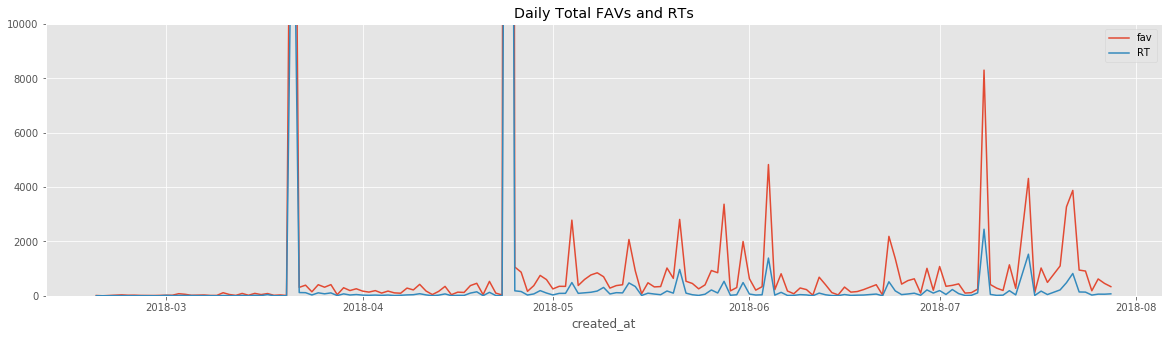

In [277]:
# FavとRTを時系列グラフに落とし込む

date_grouped_df.plot(
    ylim =(0,10000), # 0-100までを取得
    kind= "line", # 他にもヒストグラム(hist)
    figsize = (20,5), # 画像の大きさ、横：縦をtappleで。
    title = "Daily Total FAVs and RTs"
)

In [159]:
# 一日のツイート数を日付ごとにgroupbyする

tweets_sum_df = df.groupby(df['created_at'].dt.date).count()
tweets_sum_df.head(5)

,created_at,text,fav,RT
created_at,,,,
2018-02-18,6,6,6,6
2018-02-19,3,3,3,3
2018-02-20,8,8,8,8
2018-02-21,11,11,11,11
2018-02-22,9,9,9,9


In [160]:
# いらない行を削除し、countという列名に名前を変更する

dropped_tweets_sum_df = tweets_sum_df.drop(["text", "fav", "RT"], axis = 1).rename(columns={"created_at":"count"})
dropped_tweets_sum_df.head()

,count
created_at,
2018-02-18,6
2018-02-19,3
2018-02-20,8
2018-02-21,11
2018-02-22,9


In [161]:
# ツイート数のDataFrameと、RT、Fav数のDataFrameを結合する

merged_df = pd.merge(date_grouped_df, dropped_tweets_sum_df, left_index=True, right_index=True)
merged_df.tail(5)

,fav,RT,count
created_at,,,
2018-07-24,910,136,9
2018-07-25,185,26,5
2018-07-26,620,61,17
2018-07-27,456,59,5
2018-07-28,337,72,11


In [162]:
# ぞれぞれの相関係数を可視化する

merged_df.corr()

,fav,RT,count
fav,1.000000,0.992230,0.318507
RT,0.992230,1.000000,0.323485
count,0.318507,0.323485,1.000000


In [163]:
# フォロワー数とその先日比較の増減数のCSVを読み込む

followers_df = pd.read_csv("followers.csv", index_col=0)
followers_df.head()

,follower,follower_increase,EXECUTION
created_at,,,
2018/04/12 0:00:00,2843,0,NaN
2018/04/13 0:00:00,2875,32,NaN
2018/04/14 0:00:00,2878,3,NaN
2018/04/15 0:00:00,2909,31,NaN
2018/04/16 0:00:00,2918,9,NaN


In [164]:
# 施策(EXECUTION)は今回の分析で使わないので削除する

followers_EXECUTION_dropped_df = followers_df.drop(['EXECUTION'], axis = 1)
followers_EXECUTION_dropped_df.head()

,follower,follower_increase
created_at,,
2018/04/12 0:00:00,2843,0
2018/04/13 0:00:00,2875,32
2018/04/14 0:00:00,2878,3
2018/04/15 0:00:00,2909,31
2018/04/16 0:00:00,2918,9


In [165]:
# mergeするためのcreated_atをtimestamp型に変換する

followers_EXECUTION_dropped_df.index= pd.to_datetime(followers_EXECUTION_dropped_df.index)
followers_EXECUTION_dropped_df.head()

,follower,follower_increase
created_at,,
2018-04-12,2843,0
2018-04-13,2875,32
2018-04-14,2878,3
2018-04-15,2909,31
2018-04-16,2918,9


In [166]:
# 結合するdataframe

merged_df.head()

,fav,RT,count
created_at,,,
2018-02-18,11,1,6
2018-02-19,1,0,3
2018-02-20,12,2,8
2018-02-21,25,6,11
2018-02-22,34,4,9


In [167]:
# マージして先頭100件を確認する。followerとfollower_increaseは途中から計測しはじめたので、片方は入っていない。なのでouter joinする

pd.merge(merged_df, followers_EXECUTION_dropped_df, how='outer', left_index=True, right_index=True).head(100)

,fav,RT,count,follower,follower_increase
created_at,,,,,
2018-02-18,11.0,1.0,6.0,NaN,NaN
2018-02-19,1.0,0.0,3.0,NaN,NaN
2018-02-20,12.0,2.0,8.0,NaN,NaN
2018-02-21,25.0,6.0,11.0,NaN,NaN
2018-02-22,34.0,4.0,9.0,NaN,NaN
2018-02-23,21.0,5.0,17.0,NaN,NaN
2018-02-24,23.0,3.0,24.0,NaN,NaN
2018-02-25,14.0,4.0,13.0,NaN,NaN
2018-02-26,12.0,3.0,18.0,NaN,NaN


In [168]:
# NaNを可視化する

pd.merge(merged_df, followers_EXECUTION_dropped_df, how='outer', left_index=True, right_index=True).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 161 entries, 2018-02-18 to 2018-07-28
Data columns (total 5 columns):
fav                  158 non-null float64
RT                   158 non-null float64
count                158 non-null float64
follower             108 non-null float64
follower_increase    108 non-null float64
dtypes: float64(5)
memory usage: 7.5 KB


In [282]:
# 欠損値(NaN)を削除する

final_df = pd.merge(merged_df, followers_EXECUTION_dropped_df, how='outer', left_index=True, right_index=True).dropna()
final_df.head(50)

,fav,RT,count,follower,follower_increase
created_at,,,,,
2018-04-12,45.0,4.0,12.0,2843.0,0.0
2018-04-13,164.0,24.0,35.0,2875.0,32.0
2018-04-14,346.0,69.0,32.0,2878.0,3.0
2018-04-15,40.0,5.0,9.0,2909.0,31.0
2018-04-16,134.0,16.0,27.0,2918.0,9.0
2018-04-17,124.0,14.0,24.0,2935.0,17.0
2018-04-18,376.0,100.0,24.0,2965.0,30.0
2018-04-19,460.0,147.0,19.0,2987.0,22.0
2018-04-20,42.0,4.0,10.0,3018.0,31.0


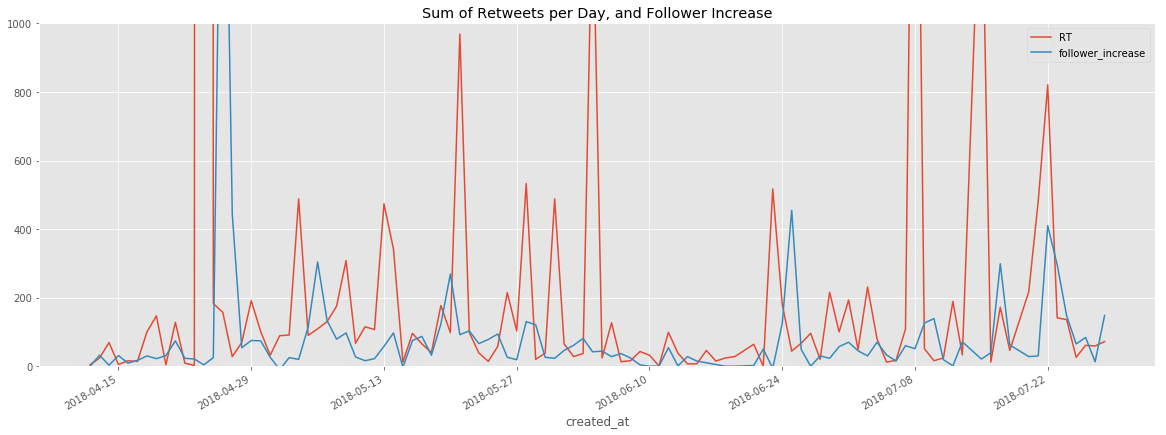

In [284]:
final_df[["RT", "follower_increase"]].plot(
  ylim=[0, 1000], # y軸の範囲指定
  figsize = (20,7), # 画像の大きさ、横：縦をtappleで。
  title = "Sum of Retweets per Day, and Follower Increase"
)

In [214]:
# 相関係数を確認する

final_df.corr()


,fav,RT,count,follower,follower_increase
fav,1.000000,0.999612,0.380778,-0.171436,-0.033114
RT,0.999612,1.000000,0.377705,-0.178247,-0.036336
count,0.380778,0.377705,1.000000,-0.557172,0.194310
follower,-0.171436,-0.178247,-0.557172,1.000000,-0.019531
follower_increase,-0.033114,-0.036336,0.194310,-0.019531,1.000000


In [215]:
# フォロワーの増加数と、RT数は相関していそうだが、この図を見るとほぼ影響がなさそうである。
# 原因としては、ツイートしてから拡散するまでに時差があるからかもしれない。
# 一応時差を取ると相関はしていそうではある。

# フォロワーの増加を1日ずらした値を取得する
final_df["follower_increase"].shift(-1).head(10)

created_at
2018-04-12    32.0
2018-04-13     3.0
2018-04-14    31.0
2018-04-15     9.0
2018-04-16    17.0
2018-04-17    30.0
2018-04-18    22.0
2018-04-19    31.0
2018-04-20    74.0
2018-04-21    23.0
Name: follower_increase, dtype: float64

In [216]:
# 1行ずらしているので、最後の値が欠損値になる。あとで欠損値は削除する

final_df["follower_increase"].shift(-1).tail()

created_at
2018-07-24     65.0
2018-07-25     84.0
2018-07-26     13.0
2018-07-27    148.0
2018-07-28      NaN
Name: follower_increase, dtype: float64

In [217]:
# 行として新しく、1日前にずらしたfollower_increaseを追加する

final_df["lag_follower_increase"] = final_df["follower_increase"].shift(-1)
final_df.tail(10)

,fav,RT,count,follower,follower_increase,lag_follower_increase
created_at,,,,,,
2018-07-18,493.0,46.0,7.0,10754.0,62.0,28.0
2018-07-20,1099.0,217.0,8.0,10809.0,28.0,30.0
2018-07-21,3272.0,482.0,12.0,10839.0,30.0,410.0
2018-07-22,3878.0,821.0,16.0,11249.0,410.0,296.0
2018-07-23,947.0,141.0,15.0,11545.0,296.0,147.0
2018-07-24,910.0,136.0,9.0,11692.0,147.0,65.0
2018-07-25,185.0,26.0,5.0,11757.0,65.0,84.0
2018-07-26,620.0,61.0,17.0,11841.0,84.0,13.0
2018-07-27,456.0,59.0,5.0,11854.0,13.0,148.0


In [218]:
# 生じたNaNを削除することができる
final_df.dropna().tail(10)

,fav,RT,count,follower,follower_increase,lag_follower_increase
created_at,,,,,,
2018-07-17,1023.0,172.0,1.0,10692.0,299.0,62.0
2018-07-18,493.0,46.0,7.0,10754.0,62.0,28.0
2018-07-20,1099.0,217.0,8.0,10809.0,28.0,30.0
2018-07-21,3272.0,482.0,12.0,10839.0,30.0,410.0
2018-07-22,3878.0,821.0,16.0,11249.0,410.0,296.0
2018-07-23,947.0,141.0,15.0,11545.0,296.0,147.0
2018-07-24,910.0,136.0,9.0,11692.0,147.0,65.0
2018-07-25,185.0,26.0,5.0,11757.0,65.0,84.0
2018-07-26,620.0,61.0,17.0,11841.0,84.0,13.0


In [219]:
# NaNを削除して、さらにfollowerを減らす

final_df = final_df.dropna().drop(["follower"], axis=1)
final_df.head(10)

,fav,RT,count,follower_increase,lag_follower_increase
created_at,,,,,
2018-04-12,45.0,4.0,12.0,0.0,32.0
2018-04-13,164.0,24.0,35.0,32.0,3.0
2018-04-14,346.0,69.0,32.0,3.0,31.0
2018-04-15,40.0,5.0,9.0,31.0,9.0
2018-04-16,134.0,16.0,27.0,9.0,17.0
2018-04-17,124.0,14.0,24.0,17.0,30.0
2018-04-18,376.0,100.0,24.0,30.0,22.0
2018-04-19,460.0,147.0,19.0,22.0,31.0
2018-04-20,42.0,4.0,10.0,31.0,74.0


In [220]:
# 再度相関係数を確認する

final_df.corr()

,fav,RT,count,follower_increase,lag_follower_increase
fav,1.000000,0.999613,0.380642,-0.032777,-0.016029
RT,0.999613,1.000000,0.377584,-0.036034,-0.023181
count,0.380642,0.377584,1.000000,0.194937,0.312793
follower_increase,-0.032777,-0.036034,0.194937,1.000000,0.174734
lag_follower_increase,-0.016029,-0.023181,0.312793,0.174734,1.000000


Text(0.5,0.98,'Outlier in RT and Favs observable')

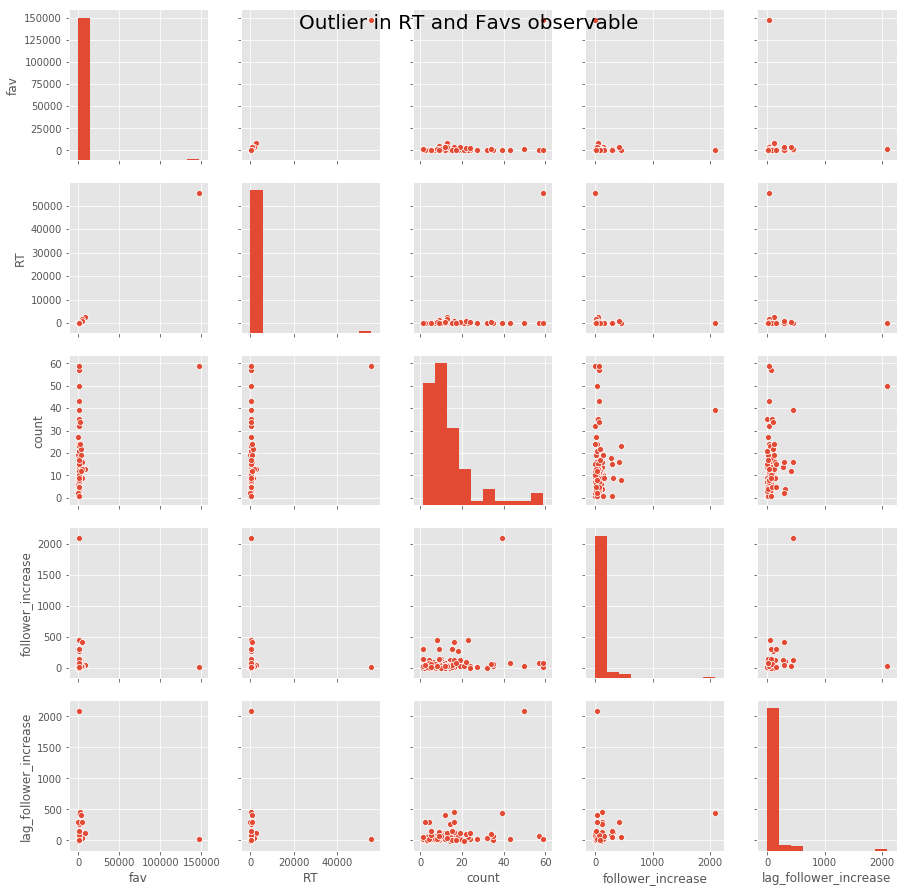

In [221]:
# それでもフォロワーの増加数とリツイート数の関係性がない。グラフからはもっとありそうだけど。
# 相関行列で可視化する

import seaborn as sns
pg = sns.pairplot(final_df.dropna())
#pg.fig.title("Correlation Matrix of RTs, Likes, Follower Increase", fontsize=12)
pg.fig.suptitle("Outlier in RT and Favs observable", fontsize=20)

In [229]:
# 相関行列で可視化して結果、RTとFavに大きな外れ値があることが分かった
# そこで外れ値を除去する。
# 四分位範囲を基準に外れ値をNanで埋める関数を利用して、外れ値をNaNにする 
# 詳しい関数の解説は https://qiita.com/mizutaku17/items/6bd8e778b6e9ec7b162d

def outlier_iqr(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,i]

        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲

        # 外れ値の基準点
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df

# 上記の関数を実行し、外れ値をNaNにする
outlier_removed_final_df = outlier_iqr(final_df).dropna()

In [230]:
# 外れ値調整済みデータフレームのNaNを確認する
outlier_removed_final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-04-12 to 2018-07-27
Data columns (total 5 columns):
fav                      72 non-null float64
RT                       72 non-null float64
count                    72 non-null float64
follower_increase        72 non-null float64
lag_follower_increase    72 non-null float64
dtypes: float64(5)
memory usage: 3.4 KB


In [231]:
# 外れ値を除去して、データ全体を可視化する

outlier_removed_final_df.describe()

,fav,RT,count,follower_increase,lag_follower_increase
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,373.666667,64.805556,9.000000,41.013889,39.791667
std,284.234827,60.034647,5.792175,37.045268,35.764463
min,21.000000,0.000000,1.000000,-10.000000,-10.000000
25%,171.750000,16.750000,4.750000,15.750000,15.750000
50%,324.000000,44.500000,8.500000,29.000000,29.000000
75%,464.750000,98.250000,12.000000,62.750000,62.000000
max,1140.000000,231.000000,27.000000,147.000000,148.000000


In [232]:
# 相関行列で相関係数を可視化する

outlier_removed_final_df.corr()

,fav,RT,count,follower_increase,lag_follower_increase
fav,1.000000,0.847689,0.136906,0.234276,0.291705
RT,0.847689,1.000000,0.088947,0.108498,0.244634
count,0.136906,0.088947,1.000000,-0.086054,0.052013
follower_increase,0.234276,0.108498,-0.086054,1.000000,0.275462
lag_follower_increase,0.291705,0.244634,0.052013,0.275462,1.000000


In [233]:
# 時差を調整したフォロワーの増加が正の相関係数を示したので、follower_increaseを除去する

outlier_removed_final_df.drop(["follower_increase"], axis=1).columns

# 列が消えたかどうかを確認する


Index(['fav', 'RT', 'count', 'lag_follower_increase'], dtype='object')

In [234]:
outlier_removed_final_df.drop(["follower_increase"], axis=1).corr()

,fav,RT,count,lag_follower_increase
fav,1.000000,0.847689,0.136906,0.291705
RT,0.847689,1.000000,0.088947,0.244634
count,0.136906,0.088947,1.000000,0.052013
lag_follower_increase,0.291705,0.244634,0.052013,1.000000


Text(0.5,0.98,'Correlation Matrix of RTs, Likes, Follower Increase - removing outliers -')

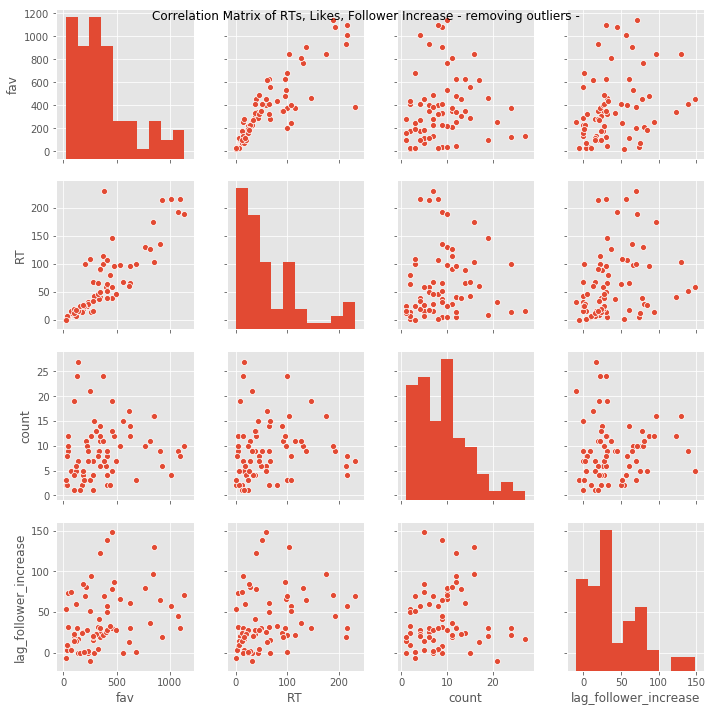

In [236]:
# 相関行列を可視化する

import seaborn as sns
pg = sns.pairplot(outlier_removed_final_df.drop(["follower_increase"], axis=1))
pg.fig.suptitle("Correlation Matrix of RTs, Likes, Follower Increase - removing outliers -", fontsize=12)


In [260]:
# フォロワーの増加数を重回帰分析してみる

from sklearn import linear_model
clf = linear_model.LinearRegression()

# 使わなくなったfollower_increaseを削除
reg_df =outlier_removed_final_df.drop(["follower_increase"], axis=1)

# 説明変数として、lag_follower_increaseを抜いたデータフレームを取得
reg_df_except_lag_follower_increase = reg_df.drop("lag_follower_increase", axis=1)

X = reg_df_except_lag_follower_increase.as_matrix()

# 目的変数として、lag_follower_increaseのSeriesを代入
Y = reg_df["lag_follower_increase"].as_matrix()

# 目的変数にYを、説明変数にXを代入して重回帰分析を実行
clf.fit(X, Y)

# 偏回帰係数を出力
print(pd.DataFrame({"Name":reg_df_except_lag_follower_increase.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


   Coefficients   Name
1     -0.004897     RT
0      0.037373    fav
2      0.074590  count
25.47265301691975


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [261]:
# 正規化する
# 参考　https://pythondatascience.plavox.info/scikit-learn/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0
# http://hk29.hatenablog.jp/entry/2018/05/14/023231


